In [18]:
import numpy as np
import pandas as pd
import wandb
import src.viz as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.hyperbolic import Hyperbolic

In [19]:
import src.setcwd

src.setcwd.main()
import os

my_28brains_dir = os.path.dirname(os.getcwd())
print("my28brains_dir: ", my_28brains_dir)

Working directory:  /Users/adelemyers/code/my28brains/src
Directory added to path:  /Users/adelemyers/code/my28brains
Directory added to path:  /Users/adelemyers/code/my28brains/src
Directory added to path:  /Users/adelemyers/code/my28brains/src/notebooks
Directory added to path:  /Users/adelemyers/code/my28brains/src/notebooks/csv
Directory added to path:  /Users/adelemyers/code/my28brains/H2_SurfaceMatch
Directory added to path:  /Users/adelemyers/code/my28brains/project_regression
Directory added to path:  /Users/adelemyers/code/my28brains/project_regression/notebooks
Directory added to path:  /Users/adelemyers/code/my28brains/project_regression/notebooks/csv
my28brains_dir:  /Users/adelemyers/code/my28brains


In [21]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("bioshape-lab/my28brains-project_regression")

start_date = pd.to_datetime("2023-02-21")

model_name = "model_1"

desired_tags = {model_name}

summary_list, config_list, name_list = [], [], []
for run in runs: 
    run_tags = set(run.tags)
    
    if pd.to_datetime(run.createdAt) > start_date and desired_tags.issubset(run_tags):
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)
    
        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
              if not k.startswith('_')})
    
        # .name is the human-readable name of the run.
        name_list.append(run.name)

summary_df = pd.DataFrame.from_dict(
    summary_list)
config_df = pd.DataFrame.from_dict(
    config_list)
name_df = pd.DataFrame.from_dict(
    name_list)

runs_df = pd.concat([summary_df, config_df, name_df], axis = 1)

save_path = os.path.join(my_28brains_dir, f"project_regression/notebooks/csv/{model_name}.csv")

runs_df.to_csv(save_path)

In [17]:
runs_df.head()

,geodesic_tol,true_coef_fig,X,model,n_faces,estimator,true_coef,linear_noise,true_intercept,linear_coef_hat,...,tol_factor,project_dir,start_shape,torch_dtype,dataset_name,linear_noise,noise_factor,n_subdivisions,project_linear_noise,0
0,137.527046,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[0, 0.03333333333333333, 0.06666666666666667, ...",4,12,Lin2015,"[[1, -1, -1], [-1, -1, -1], [0, 0, 0], [0, 0, ...",True,"[[1, 1, 1], [1, -1, 1], [1, -1, -1], [1, 1, -1...","[[0.9397505311716564, -0.44110970089930635, -0...",...,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.20,None,True,run_vbqmg3nm
1,107.078190,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[0, 0.03333333333333333, 0.06666666666666667, ...",4,12,Lin2015,"[[1, -1, -1], [-1, -1, -1], [0, 0, 0], [0, 0, ...",True,"[[1, 1, 1], [1, -1, 1], [1, -1, -1], [1, 1, -1...","[[1.1271892583071903, -0.8246552744257634, -1....",...,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.10,None,True,run_ujkoxeas
2,70.356736,{'sha256': 'f5c1de4081fcd533019be9c33b9f7ae1cf...,"[0, 0.03333333333333333, 0.06666666666666667, ...",4,12,Lin2015,"[[1, -1, -1], [-1, -1, -1], [0, 0, 0], [0, 0, ...",True,"[[1, 1, 1], [1, -1, 1], [1, -1, -1], [1, 1, -1...","[[0.922691183775316, -0.7516398692052936, -0.8...",...,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.01,None,True,run_wyx4e85r
3,69.120000,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[0, 0.03333333333333333, 0.06666666666666667, ...",4,12,Lin2015,"[[1, -1, -1], [-1, -1, -1], [0, 0, 0], [0, 0, ...",True,"[[1, 1, 1], [1, -1, 1], [1, -1, -1], [1, 1, -1...","[[0.7365059969847823, -0.9170668421252336, -0....",...,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.00,None,True,run_glnnlq29
4,46.130390,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25,...",4,12,Lin2015,"[[1, -1, -1], [-1, -1, -1], [0, 0, 0], [0, 0, ...",True,"[[1, 1, 1], [1, -1, 1], [1, -1, -1], [1, 1, -1...","[[1.221802461725105, -1.4447112055847324, -0.8...",...,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.20,None,True,run_k8sod9qh


# Choose which model to analyze

In [22]:
model_name = "model_4"

path = os.path.join(my_28brains_dir, f"project_regression/notebooks/csv/{model_name}.csv")

df = pd.read_csv(path)
df = df.dropna(axis=1, how='all')
df.head()

,Unnamed: 0,n_vertices,noise_factor,true_coef_fig,lr_intercept_err,linear_intercept_hat,mesh_sequence_vertices,_wandb,_timestamp,geodesic_tol,...,estimator.1,tol_factor,project_dir,start_shape,torch_dtype,dataset_name,linear_noise.1,noise_factor.1,project_linear_noise,0
0,0,8,0.20,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[[-0.4427300188307455, 0.04696051294087899, 0....","[[0.5572699811692545, 1.046960512940879, 1.230...","{'_type': 'object3D-file', 'sha256': 'fdbb2962...",{'runtime': 17},1.709512e+09,167.493065,...,Lin2015,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.20,True,run_3dbsbyyu
1,1,8,0.10,"{'_type': 'object3D-file', 'sha256': 'f5c1de40...","[[0.036350697998341674, -0.006917983137728845,...","[[1.0363506979983417, 0.9930820168622712, 0.84...",{'sha256': '90d26b586aee00557ee11322c5074a0283...,{'runtime': 14},1.709512e+09,86.323290,...,Lin2015,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.10,True,run_2bskdkv4
2,2,8,0.01,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[[0.05159107780510275, 0.013774544554275623, -...","[[1.0515910778051027, 1.0137745445542756, 0.97...",{'sha256': '67343c52a3edddcfab6bcc716425670b85...,{'runtime': 12},1.709512e+09,69.929094,...,Lin2015,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.01,True,run_szi8fd27
3,3,8,0.00,{'path': 'media/object3D/true_coef_fig_2_f5c1d...,"[[0.05317753156252736, -0.01365581694170792, -...","[[1.0531775315625274, 0.986344183058292, 0.998...",{'path': 'media/object3D/mesh_sequence_vertice...,{'runtime': 12},1.709512e+09,69.120000,...,Lin2015,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.00,True,run_t3ub8km1
4,4,8,0.20,{'sha256': 'f5c1de4081fcd533019be9c33b9f7ae1cf...,"[[-0.013811808498528366, -0.03571202306006671,...","[[0.9861881915014716, 0.9642879769399332, 1.05...",{'path': 'media/object3D/mesh_sequence_vertice...,{'runtime': 12},1.709512e+09,44.124734,...,Lin2015,0.01,/home/adele/code/my28brains/project_regression,cube,torch.float64,synthetic_mesh,True,0.20,True,run_n83jeke9


In [23]:
# df_hyperboloid = df[df["dataset_name"] == "hyperboloid"]
# df_hyperboloid = df_hyperboloid.dropna(axis=1, how='all')
# df_hyperboloid.head()

""


In [24]:
# df_hypersphere = df[df["dataset_name"] == "hypersphere"]
# df_hypersphere = df_hypersphere.dropna(axis=1, how='all')
# df_hypersphere.head()

""


In [27]:
df.columns

Index(['Unnamed: 0', 'n_vertices', 'noise_factor', 'true_coef_fig',
       'lr_intercept_err', 'linear_intercept_hat', 'mesh_sequence_vertices',
       '_wandb', '_timestamp', 'geodesic_tol', 'estimator_coef_hat_fig',
       'estimator_intercept_err', 'estimator_intercept_hat_fig', 'model',
       'true_intercept', 'lr_duration_time', 'true_intercept_fig',
       'lr_intercept_err_sum', 'true_coef', 'mesh_diameter', 'linear_coef_hat',
       'lr_intercept_err_norm', 'estimator_intercept_err_sum', 'linear_noise',
       'estimator_coef_err_norm', 'lr_coef_err_sum', 'lr_coef_err_norm',
       'estimator_coef_hat', 'n_faces', 'lr_coef_err', 'rmsd_linear',
       'estimator_coef_err', 'estimator_intercept_hat',
       'estimator_y_prediction_fig', 'estimator_intercept_err_norm', 'X',
       '_runtime', 'estimator', 'rmsd_geodesic', 'estimator_coef_err_sum',
       'estimator_duration_time', '_step', 'n_gr_iterations',
       'n_gr_jacobian_evaluations', 'n_gr_function_evaluations', 'n_X',


# Convert linear residuals truth values into ints (for color map)

In [ ]:
df_hypersphere["linear_residuals_colors"] = df_hypersphere["linear_residuals"]*1
# print(df_hypersphere[df_hypersphere["linear_residuals_colors"]==1])

df_hypersphere["linear_noise_colors"] = df_hypersphere["linear_noise"]*1

In [ ]:
df_hyperboloid["linear_residuals_colors"] = df_hyperboloid["linear_residuals"]*1

df_hyperboloid["linear_noise_colors"] = df_hyperboloid["linear_noise"]*1

In [ ]:
COL_TO_TEXT = {
    "linear_residuals_colors": "Linear Residuals: 1 = True",
    "linear_noise_colors": "Linear Noise: 1 = True",
    "geodesic_coef_err" : "Geodesic Coef Error",
    "geodesic_duration_time" : "Geodesic Duration Time",
    "noise_factor": "Noise Factor",
    "rmsd_geod": "RMSD, Geodesic Regression",
    "nrmsd_geod": "Normalized RMSD, Geodesic Regression",
    "n_X": "Number of Points",
    "n_geod_iterations": "Number of iterations in GR",
}

# First, look at Hypersphere

In [ ]:
import plotly.express as px
import plotly.io as pio

fontsize = 15


def diff_scatter_grouped(
    df,
    colored_by="linear_residuals_colors",
    marked_by="geodesic_coef_err",
    y_label="geodesic_coef_err",
    x_label = "geodesic_duration_time",
):
    x = df[x_label]
    y = df[y_label]
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["square", "x", "cross", "diamond", "star"])
    )

    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = px.colors.sequential.Viridis_r

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=color_discrete_sequence,  # px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        # color_discrete_sequence=px.colors.sequential.Viridis_r, #px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT[x_label],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[y_label], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[colored_by]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=9, opacity=0.9))
    pio.write_image(fig, f"regression_benchmark_{colored_by}.svg")
    fig.show()

In [ ]:
diff_scatter_grouped(
    df = df_hypersphere,
    colored_by="linear_residuals_colors",
    marked_by="geodesic_coef_err",
    y_label="geodesic_coef_err",
    x_label = "n_geod_iterations",
)

# Hyperboloid plot

In [ ]:
diff_scatter_grouped(
    df = df_hyperboloid,
    colored_by="linear_residuals_colors",
    marked_by="geodesic_coef_err",
    y_label="geodesic_coef_err",
    x_label = "n_geod_iterations",
)

# Meeting with Nina: plots from white board

1. Visualization of one training --> Go to notebook 10

In [ ]:
dim = 2
n_X = 30
space = Hyperbolic(dim=dim, default_coords_type="extrinsic")

In [ ]:
true_sequence = space.metric.geodesic()

In [ ]:
viz.benchmark_data_sequence(space=space, sequence_1=true_sequence, sequence_2 = , sequence_3 = )

2. RMSD linear as a function of noise level

In [ ]:
# Parameters to fix
dataset_name = "hypersphere"
n_X = 30
dim = 3

In [ ]:
df_space = df[df["dataset_name"] == dataset_name]
df_space = df_space.dropna(axis=1, how='all')
df_space["linear_residuals_colors"] = df_space["linear_residuals"]*1
df_space["linear_noise_colors"] = df_space["linear_noise"]*1

df2 = df_space[df_space["space_dimension"] == dim]

In [ ]:
#df_hyperboloid_gr = df_hyperboloid[df_hyperboloid["linear_residuals"] == False]

In [ ]:
diff_scatter_grouped(
    df = df2,
    colored_by="linear_residuals_colors",
    marked_by="linear_noise_colors",
    y_label="nrmsd_geod",
    x_label = "noise_factor",
)

3. RMSD geodesic as a function of noise level (same plot as above, but we want to record the geodesic formulation of the RMSD)

In [ ]:
diff_scatter_grouped(
    df = df_hyperboloid_gr,
    colored_by="linear_residuals_colors",
    marked_by="linear_noise_colors",
    y_label="nrmsd_geod",
    x_label = "noise_factor",
)

4. Number of iterations as a function of the sample size n_X

4a.hyperboloid

In [ ]:
# Parameters to fix
dataset_name = "hypersphere"

dim = 3
noise_factor = 0.01
noise_type = "geodesic"

In [ ]:
df_space = df[df["dataset_name"] == dataset_name]
df_space = df_space.dropna(axis=1, how='all')
df_space["linear_residuals_colors"] = df_space["linear_residuals"]*1
df_space["linear_noise_colors"] = df_space["linear_noise"]*1

df4 = df_space[df_space["space_dimension"] == dim]
df4 = df4[df4["noise_factor"] == noise_factor]
df4 = df4[df4["linear_noise"] == (noise_type == "linear")]

In [ ]:
diff_scatter_grouped(
    df = df4,
    colored_by="linear_residuals_colors",
    marked_by="linear_noise_colors",
    y_label="n_geod_iterations",
    x_label = "n_X",
)

4b.hypersphere

## New viz function

In [42]:
import glob
import os
import subprocess

import geomstats.backend as gs
import geomstats.visualization as visualization
import matplotlib
import matplotlib.pyplot as plt
import nibabel
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from matplotlib import animation


COL_TO_TEXT = {
    "diff_seq_per_time_vertex_diameter": "Error per mesh per vertex [% diameter]",
    "diff_seq_duration_per_time_and_vertex": "Time difference [secs] per mesh and vertex",
    "relative_diff_seq_duration": "Time difference per vertex [% line]",
    "n_steps": "Number of steps",
    "n_vertices": "Number of vertices",
    "rmsd": "RMSD",
    "rmsd_linear": "RMSD, linear dist",
    "rmsd_diameter": "RMSD, Line vs. Geodesic (per diameter)",
    "speed": "Speed gain",
    "accuracy": "Accuracy",
    "linear_residuals": "Regression",
    "linear_noise": "Noise",
    "geodesic_coef_err": "Geodesic Coef Error",
    "geodesic_duration_time": "Geodesic Duration Time",
    "noise_factor": "Noise Factor",
    "rmsd_geod": "RMSD, Geodesic Regression",
    "nrmsd_geod": "Normalized RMSD, Geodesic Regression",
    "n_X": "Number of Points",
    "n_geod_iterations": "Number of iterations in GR",
    "estimator": "Estimator"
}

FONTSIZE = 18

def scatterplot_evaluation(
    df,
    colored_by="noise_factor",
    marked_by="n_steps",
    x_label="n_steps",
    y_label="relative_diff_seq_duration",
):
    """Scatterplot of results.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe made from wandb with config and results.
    colored_by : string
        Column name to color the points by.
    marked_by : string
        Column name to mark the points by, using different symbols.
    x_label : string
        Column name to plot on the x-axis.
    y_label : string
        Column name to plot on the y-axis.
    """
    x = df[x_label]
    y = df[y_label]
    value_to_symbol = dict(
        zip(df[marked_by].unique(), ["arrow-left", "arrow-right", "arrow-left", "square", "x", "cross", "diamond", "star"])
    )

    marked_values = [s for s in df[marked_by].values]
    if marked_by == "linear_noise":
        symbol_value_to_legend_value = {
            s: "Linear Noise" if s else "Manifold Noise" for s in df[marked_by].unique()
        }
        marked_values = [
            symbol_value_to_legend_value[s] if ~np.isnan(s) else s
            for s in df[marked_by].values
        ]

    colored_values = [str(c) for c in df[colored_by].values]
    if colored_by == "linear_residuals":
        color_value_to_legend_value = {
            c: "GRLR" if c else "GR" for c in df[colored_by].unique()
        }
        colored_values = [
            color_value_to_legend_value[c] if ~np.isnan(c) else c
            for c in df[colored_by].values
        ]

    if colored_by == "n_steps":
        color_discrete_sequence = px.colors.sequential.Plasma_r
    else:
        color_discrete_sequence = px.colors.sequential.Viridis_r #

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=colored_values,
        color_discrete_sequence=color_discrete_sequence,
        symbol=marked_values,
        symbol_map=value_to_symbol,
    )

    legend_title = COL_TO_TEXT[colored_by] + ", " + COL_TO_TEXT[marked_by]

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT[x_label],
            font=dict(family="CMU", size=FONTSIZE),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[y_label], font=dict(family="CMU", size=FONTSIZE)
        ),
        title_font=dict(family="CMU", size=FONTSIZE),
        xaxis=dict(tickfont=dict(family="CMU", size=FONTSIZE)),
        yaxis=dict(tickfont=dict(family="CMU", size=FONTSIZE)),
        legend=dict(font=dict(family="CMU", size=FONTSIZE), title=legend_title),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=9, opacity=0.9))
    fig.show()
    # return fig


# For Meshes

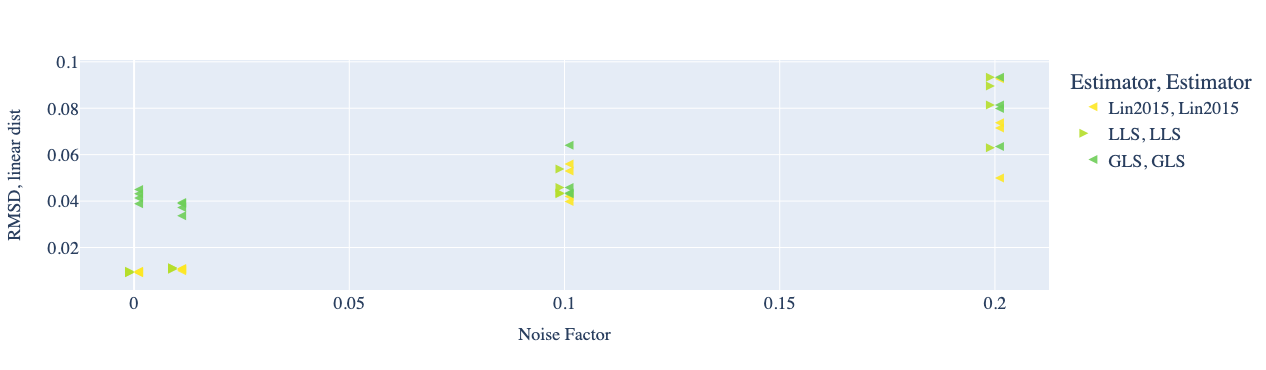

In [44]:
scatterplot_evaluation(
    df= df,
    colored_by="estimator",
    marked_by="estimator",
    x_label="noise_factor",
    y_label="rmsd_linear",
)